In [1]:
import os
from tqdm import tqdm
import numpy as np
import pandas as pd
from joblib import Parallel, delayed
from ogb.utils.url import download_url, extract_zip
from matplotlib import pyplot as plt
import seaborn as sns
import tarfile
from copy import deepcopy

from molecules.physics import generate_physics_dict_structure
from molecules.parse_sdf import sdf_to_mols

In [2]:
ROOT = "."
SDF_URL = "http://ogb-data.stanford.edu/data/lsc/pcqm4m-v2-train.sdf.tar.gz"
SDF_LOCAL = f"{ROOT}/pcqm4m-v2-train.sdf"
SDF_LOCAL_ZIP = f"{SDF_LOCAL}.tar.gz"
RAW_URL = "http://ogb-data.stanford.edu/data/lsc/pcqm4m-v2.zip"
RAW_CSV = f"{ROOT}/pcqm4m-v2/raw/data.csv.gz"
SKIP_DOWNLOAD = False # Set to false for downloading and unzipping the file. If already downloaded, set to True

In [3]:
if not SKIP_DOWNLOAD:
    # This can take many minutes
    path = download_url(SDF_URL, ROOT)
    with tarfile.open(path) as file:
        file.extractall()

Using exist file pcqm4m-v2-train.sdf.tar.gz


In [4]:
if not SKIP_DOWNLOAD:
    raw_path = download_url(RAW_URL, ROOT)
    extract_zip(raw_path, ROOT)

Using exist file pcqm4m-v2.zip
Extracting ./pcqm4m-v2.zip


 49%|████▉     | 1651813/3378606 [05:38<05:09, 5570.96it/s]RDKit WARNING: [18:48:54] WARNING: not removing hydrogen atom without neighbors
[18:48:54] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [18:48:54] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [18:48:54] WARNING: not removing hydrogen atom without neighbors
[18:48:54] WARNING: not removing hydrogen atom without neighbors
[18:48:54] WARNING: not removing hydrogen atom without neighbors
 52%|█████▏    | 1761659/3378606 [05:58<05:05, 5300.35it/s]RDKit WARNING: [18:49:14] WARNING: not removing hydrogen atom without neighbors
[18:49:14] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [18:49:14] WARNING: not removing hydrogen atom without neighbors
[18:49:14] WARNING: not removing hydrogen atom without neighbors
 56%|█████▌    | 1893696/3378606 [06:22<04:16, 5782.82it/s]RDKit WARNING: [18:49:38] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [18

3378606


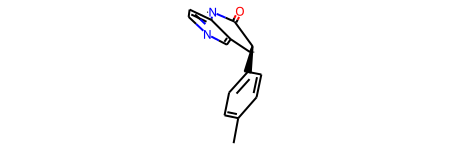

In [5]:
# WARNING: You need at least 60GB of RAM to read this file and execute the code
mols = sdf_to_mols(SDF_LOCAL, max_mols=None)
print(len(mols))
mols[0]

In [6]:
list_struct = Parallel(n_jobs=-1)(delayed(generate_physics_dict_structure)(mol, idx, skip_error=True) for idx, mol in tqdm(enumerate(mols)))
# list_struct = []
# for idx, mol in tqdm(enumerate(mols)):
#     list_struct.append(generate_physics_dict_structure(mol, idx, skip_error=False))

dict_struct = {k: [dic[k] for dic in list_struct if dic is not None] for k in list_struct[0]}
df = pd.DataFrame(dict_struct)
df = df.set_index("idx")
df

94208it [00:17, 15513.00it/s]

Failed for molecule idx=85975 SMILES=O


147456it [00:20, 16938.03it/s]

Failed for molecule idx=137779 SMILES=P


1654784it [01:56, 16048.20it/s]

Failed for molecule idx=1646655 SMILES=S


1671168it [01:57, 16879.43it/s]

Failed for molecule idx=1662363 SMILES=P
Failed for molecule idx=1662286 SMILES=C
Failed for molecule idx=1665176 SMILES=S
Failed for molecule idx=1665177 SMILES=S
Failed for molecule idx=1664472 SMILES=C
Failed for molecule idx=1664201 SMILES=C


1699840it [01:59, 17095.55it/s]

Failed for molecule idx=1693988 SMILES=N


1720320it [02:00, 16295.26it/s]

Failed for molecule idx=1711136 SMILES=N
Failed for molecule idx=1711137 SMILES=N


1736704it [02:01, 17003.90it/s]

Failed for molecule idx=1730492 SMILES=P
Failed for molecule idx=1734544 SMILES=[NH]


1740800it [02:02, 16589.18it/s]

Failed for molecule idx=1734210 SMILES=Cl
Failed for molecule idx=1736513 SMILES=P
Failed for molecule idx=1736514 SMILES=P


1748992it [02:02, 17115.75it/s]

Failed for molecule idx=1743406 SMILES=C


1757184it [02:03, 16700.99it/s]

Failed for molecule idx=1749315 SMILES=P
Failed for molecule idx=1752280 SMILES=C


1761280it [02:03, 16899.25it/s]

Failed for molecule idx=1755906 SMILES=Br


1777664it [02:04, 16652.74it/s]

Failed for molecule idx=1768820 SMILES=P
Failed for molecule idx=1773339 SMILES=[BH]
Failed for molecule idx=1773342 SMILES=[NH]


1818624it [02:07, 11926.29it/s]

Failed for molecule idx=1812920 SMILES=C


1826816it [02:07, 14538.29it/s]

Failed for molecule idx=1818416 SMILES=N


1835008it [02:08, 15248.67it/s]

Failed for molecule idx=1827685 SMILES=Cl
Failed for molecule idx=1831559 SMILES=P


1847296it [02:08, 16019.62it/s]

Failed for molecule idx=1838508 SMILES=N
Failed for molecule idx=1841135 SMILES=S


1855488it [02:09, 16395.54it/s]

Failed for molecule idx=1849751 SMILES=[NH]


1859584it [02:09, 16511.12it/s]

Failed for molecule idx=1853781 SMILES=P
Failed for molecule idx=1855419 SMILES=P


1863680it [02:09, 15901.15it/s]

Failed for molecule idx=1857468 SMILES=F
Failed for molecule idx=1857469 SMILES=F
Failed for molecule idx=1857470 SMILES=F
Failed for molecule idx=1857471 SMILES=N
Failed for molecule idx=1858155 SMILES=C


2273280it [02:35, 16690.19it/s]

Failed for molecule idx=2265330 SMILES=C


2285568it [02:35, 16441.77it/s]

Failed for molecule idx=2278189 SMILES=N
Failed for molecule idx=2278265 SMILES=Cl


2633728it [02:57, 10686.35it/s]

Failed for molecule idx=2627608 SMILES=O


2641920it [02:58, 12066.24it/s]

Failed for molecule idx=2633315 SMILES=Br


2785280it [03:06, 16548.36it/s]

Failed for molecule idx=2774781 SMILES=C


2912256it [03:14, 17442.01it/s]

Failed for molecule idx=2904023 SMILES=S


2940928it [03:16, 16361.16it/s]

Failed for molecule idx=2932345 SMILES=Cl


2990080it [03:19, 16815.41it/s]

Failed for molecule idx=2980688 SMILES=N
Failed for molecule idx=2980855 SMILES=F


2994176it [03:19, 16479.63it/s]

Failed for molecule idx=2985102 SMILES=O
Failed for molecule idx=2985105 SMILES=S
Failed for molecule idx=2984530 SMILES=C


2998272it [03:19, 16937.12it/s]

Failed for molecule idx=2991141 SMILES=Cl


3125248it [03:27, 16539.53it/s]

Failed for molecule idx=3117773 SMILES=C


3145728it [03:29, 15993.76it/s]

Failed for molecule idx=3138019 SMILES=O


3149824it [03:29, 16425.91it/s]

Failed for molecule idx=3144495 SMILES=F


3166208it [03:30, 16535.65it/s]

Failed for molecule idx=3159107 SMILES=[SiH4]


3182592it [03:31, 15635.47it/s]

Failed for molecule idx=3176383 SMILES=C
Failed for molecule idx=3176384 SMILES=C
Failed for molecule idx=3176385 SMILES=C
Failed for molecule idx=3176386 SMILES=C
Failed for molecule idx=3175805 SMILES=N


3215360it [03:33, 15942.36it/s]

Failed for molecule idx=3208582 SMILES=C


3264512it [03:36, 16665.38it/s]

Failed for molecule idx=3254373 SMILES=[BH]


3280896it [03:37, 16191.63it/s]

Failed for molecule idx=3274651 SMILES=C
Failed for molecule idx=3274341 SMILES=C


3293184it [03:38, 16512.55it/s]

Failed for molecule idx=3286931 SMILES=C
Failed for molecule idx=3286940 SMILES=C


3350528it [03:41, 17252.65it/s]

Failed for molecule idx=3342147 SMILES=Br
Failed for molecule idx=3342150 SMILES=N
Failed for molecule idx=3341898 SMILES=Cl


3354624it [03:41, 16726.57it/s]

Failed for molecule idx=3346957 SMILES=Br
Failed for molecule idx=3346961 SMILES=C
Failed for molecule idx=3347108 SMILES=O
Failed for molecule idx=3347837 SMILES=O
Failed for molecule idx=3349913 SMILES=O


3358720it [03:42, 16951.36it/s]

Failed for molecule idx=3348987 SMILES=P


3362816it [03:42, 16951.06it/s]

Failed for molecule idx=3355884 SMILES=F


3371008it [03:42, 17112.94it/s]

Failed for molecule idx=3362848 SMILES=S
Failed for molecule idx=3364037 SMILES=F


3378606it [03:43, 15148.53it/s]

Failed for molecule idx=3366711 SMILES=S


,Inertia_mass_a,Inertia_mass_b,Inertia_mass_c,Inertia_valence_a,Inertia_valence_b,Inertia_valence_c,length_a,length_b,length_c,Spherocity,Plane_best_fit
idx,,,,,,,,,,,
0,1.813462,1.601682,0.401664,1.510950,1.436966,0.173702,0.961845,0.452937,0.254786,0.152654,0.629731
1,2.308566,1.932109,0.403518,2.688305,1.975483,0.773145,1.053264,0.561198,0.126349,0.018992,0.209540
2,1.691103,1.338676,0.398564,1.848389,1.220168,0.714471,0.869384,0.583278,0.161675,0.041939,0.296200
3,1.753497,1.367217,0.411020,1.552199,1.053055,0.540122,0.875695,0.588322,0.126418,0.022437,0.204278
4,1.872057,1.467153,0.527033,1.661891,1.365148,0.350127,0.891042,0.562013,0.210463,0.081704,0.423562
...,...,...,...,...,...,...,...,...,...,...,...
3378601,1.348275,1.288381,0.529860,2.074233,1.926117,0.849037,0.828846,0.462148,0.401456,0.439983,1.001392
3378602,1.667726,1.532551,0.408586,2.339997,1.954943,0.658524,0.886473,0.473849,0.327503,0.205900,0.681391
3378603,1.450947,1.335399,0.385102,1.659290,1.385724,0.449171,0.919293,0.435652,0.331783,0.225624,0.603136


In [7]:
raw_df = pd.read_csv(RAW_CSV)
raw_df = raw_df.set_index("idx")

In [8]:
merged_df = raw_df.merge(df, how="inner", on=["idx"])
merged_df

,smiles,homolumogap,Inertia_mass_a,Inertia_mass_b,Inertia_mass_c,Inertia_valence_a,Inertia_valence_b,Inertia_valence_c,length_a,length_b,length_c,Spherocity,Plane_best_fit
idx,,,,,,,,,,,,,
0,O=C1[N]c2ccncc2[CH][C@@H]1c1ccc(cc1)C,3.047675,1.813462,1.601682,0.401664,1.510950,1.436966,0.173702,0.961845,0.452937,0.254786,0.152654,0.629731
1,COc1cc(OC)ccc1/C=C/N(C(=O)C)C,4.410966,2.308566,1.932109,0.403518,2.688305,1.975483,0.773145,1.053264,0.561198,0.126349,0.018992,0.209540
2,C=CCN(C(=O)C)/C=C/c1ccccc1C,4.639541,1.691103,1.338676,0.398564,1.848389,1.220168,0.714471,0.869384,0.583278,0.161675,0.041939,0.296200
3,C=CCN(C(=O)C)/C=C/c1ccccc1F,4.492600,1.753497,1.367217,0.411020,1.552199,1.053055,0.540122,0.875695,0.588322,0.126418,0.022437,0.204278
4,C=CCN(C(=O)C)/C=C/c1ccccc1Cl,4.612330,1.872057,1.467153,0.527033,1.661891,1.365148,0.350127,0.891042,0.562013,0.210463,0.081704,0.423562
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3378601,Cc1ccc(c(c1)C)N[C@H](/C(=N\C1CC1)/O)C,5.347037,1.348275,1.288381,0.529860,2.074233,1.926117,0.849037,0.828846,0.462148,0.401456,0.439983,1.001392
3378602,C[C@@H](/C(=N\C1CC1)/O)Nc1cccc(c1C)C,5.809631,1.667726,1.532551,0.408586,2.339997,1.954943,0.658524,0.886473,0.473849,0.327503,0.205900,0.681391
3378603,C[C@H](/C(=N\C(=N)O)/O)Nc1cccc(c1C)C,5.064039,1.450947,1.335399,0.385102,1.659290,1.385724,0.449171,0.919293,0.435652,0.331783,0.225624,0.603136


In [9]:
num_cols = merged_df.select_dtypes(include=np.floating).columns
norm_df = deepcopy(merged_df)
norm_df[num_cols] = (norm_df[num_cols] - norm_df[num_cols].mean()) / (norm_df[num_cols].std())
norm_df

,smiles,homolumogap,Inertia_mass_a,Inertia_mass_b,Inertia_mass_c,Inertia_valence_a,Inertia_valence_b,Inertia_valence_c,length_a,length_b,length_c,Spherocity,Plane_best_fit
idx,,,,,,,,,,,,,
0,O=C1[N]c2ccncc2[CH][C@@H]1c1ccc(cc1)C,-2.273641,0.854490,0.818419,0.667598,-0.015986,0.121582,-0.716656,0.911150,0.288932,0.354982,-0.022536,0.799662
1,COc1cc(OC)ccc1/C=C/N(C(=O)C)C,-1.100282,1.724550,1.414701,0.681033,1.250696,0.741143,1.719337,1.433844,1.363607,-0.987392,-1.139823,-1.197323
2,C=CCN(C(=O)C)/C=C/c1ccccc1C,-0.903551,0.639465,0.343803,0.645132,0.347055,-0.127842,1.480899,0.382505,1.582788,-0.618179,-0.948009,-0.785467
3,C=CCN(C(=O)C)/C=C/c1ccccc1F,-1.030021,0.749111,0.395307,0.735391,0.028392,-0.320105,0.772387,0.418591,1.632850,-0.986680,-1.111028,-1.222334
4,C=CCN(C(=O)C)/C=C/c1ccccc1Cl,-0.926972,0.957461,0.575650,1.575992,0.146407,0.038957,0.000293,0.506338,1.371696,-0.108269,-0.615608,-0.180169
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3378601,Cc1ccc(c(c1)C)N[C@H](/C(=N\C1CC1)/O)C,-0.294623,0.037003,0.253042,1.596480,0.590033,0.684348,2.027743,0.150729,0.380363,1.887935,2.379246,2.566009
3378602,C[C@@H](/C(=N\C1CC1)/O)Nc1cccc(c1C)C,0.103523,0.598384,0.693666,0.717751,0.875961,0.717512,1.253543,0.480212,0.496516,1.114998,0.422546,1.045184
3378603,C[C@H](/C(=N\C(=N)O)/O)Nc1cccc(c1C)C,-0.538194,0.217432,0.337889,0.547594,0.143608,0.062629,0.402783,0.667861,0.117351,1.159735,0.587417,0.673268


In [10]:
merged_df = merged_df.sort_values(by="idx")
csv_path = os.path.join(ROOT, f"pcqm4m-v2-geometry.csv.gz")
merged_df.to_csv(csv_path, index=False)

norm_df = norm_df.sort_values(by="idx")
csv_path = os.path.join(ROOT, f"pcqm4m-v2-geometry-normed.csv.gz")
norm_df.to_csv(csv_path, index=False)

<AxesSubplot:title={'center':'Correlations physics not normed pearson'}>

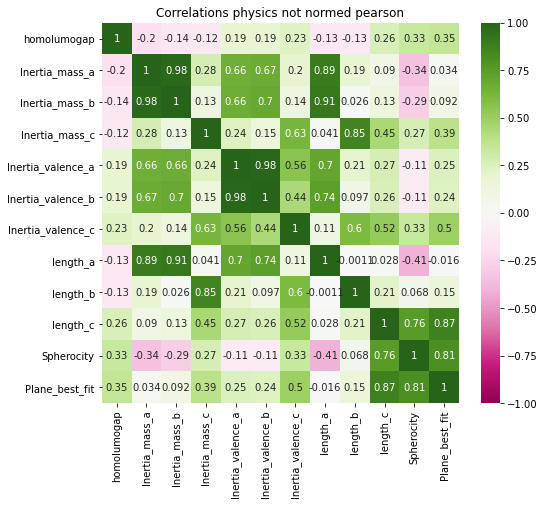

In [11]:
n_samples = min(len(merged_df), 200000)
corr = merged_df.sample(n=n_samples).corr("pearson")
plt.figure(figsize=(8,7))
plt.title("Correlations physics not normed pearson")
sns.heatmap(corr, cmap="PiYG", annot=True, vmax=1, vmin=-1)